In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Binarizer

#loading data set
df = pd.read_csv('iris_species.csv')
df['Species']=df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}) #change categorical string to int
X = df.iloc[:, 3:5].values   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 5].values



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# we're scaling here in order to visualize it easily
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)




In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', random_state=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


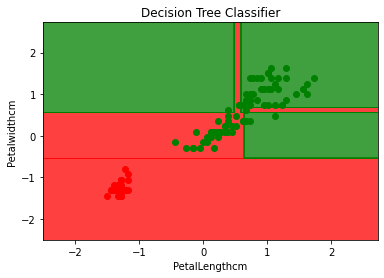

In [5]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Decision Tree Classifier')
plt.xlabel('PetalLengthcm')
plt.ylabel('Petalwidthcm')
plt.show()